<h2 align=center> Breast Cancer Diagnosis</h2>

---

### 1. Loading Libraries and Data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
features = data.columns
features

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 2. Examining Data.


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 3. Separate our Data to Create Features DataFrame and  Target DataFrame.

In [5]:
drop_col = ['id', 'diagnosis','Unnamed: 32']
x = data.drop(drop_col, axis = 1)
y = data.diagnosis

### 4. Examining Target.

Number of Bengin 357
Number of Malignant 212


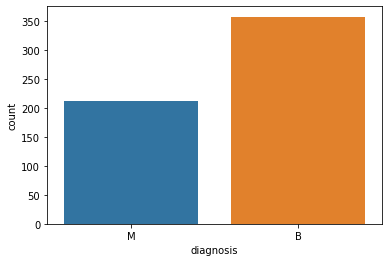

In [6]:
sns.countplot(y)

M, B = y.value_counts()
print("Number of Bengin" , M)
print("Number of Malignant", B)

### 5. Applying Explanatory Data Analysis and Data Visualization.

In [7]:
data = x
data_std = (data - data.mean()) / data.std()
data_plotted = pd.concat([y, data_std.iloc[:, 0:10]], axis = 1)
data_plotted = pd.melt(data_plotted , id_vars = 'diagnosis', var_name = 'features', value_name = 'value')

data_plotted

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


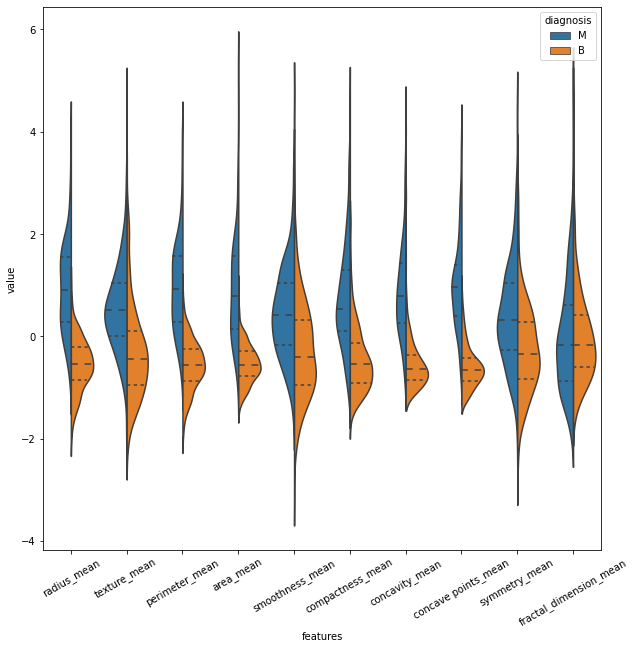

In [8]:
plt.figure(figsize=(10,10))

sns.violinplot(x = 'features' , y ='value', data = data_plotted , hue='diagnosis', split = True, inner = 'quart')
plt.xticks(rotation = 30);

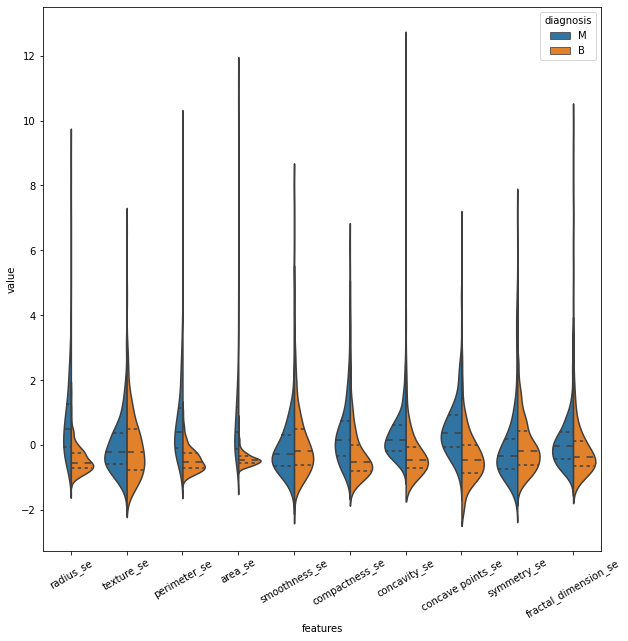

In [9]:
data_plotted = pd.concat([y, data_std.iloc[:, 10:20]], axis = 1)
data_plotted = pd.melt(data_plotted , id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x = 'features' , y ='value', data = data_plotted , hue='diagnosis', split = True, inner = 'quart')
plt.xticks(rotation = 30);

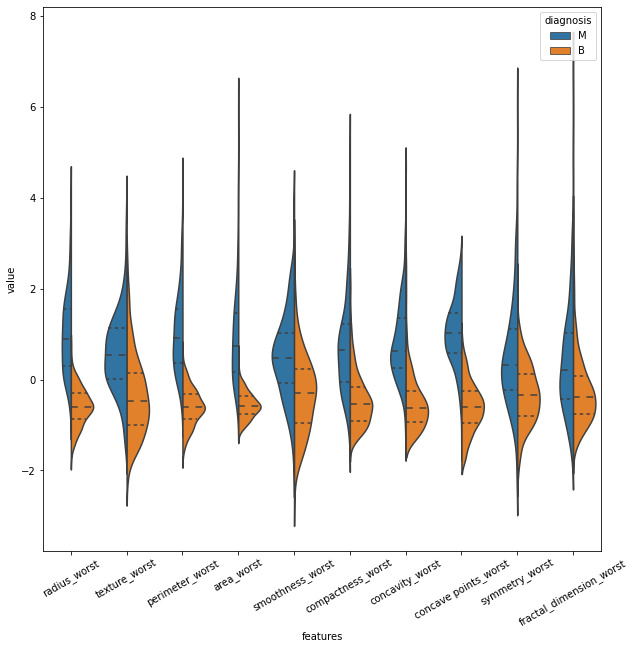

In [10]:
data_plotted = pd.concat([y, data_std.iloc[:, 20:30]], axis = 1)
data_plotted = pd.melt(data_plotted , id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x = 'features' , y ='value', data = data_plotted , hue='diagnosis', split = True, inner = 'quart')
plt.xticks(rotation = 30);

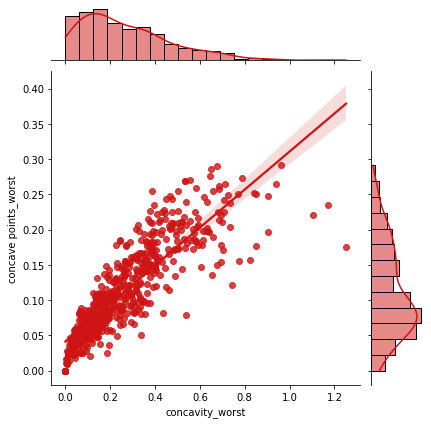

In [11]:
sns.jointplot(data.loc[: , 'concavity_worst'], data.loc[:, 'concave points_worst'], kind = 'reg' , color = '#ce1414')

<AxesSubplot:>

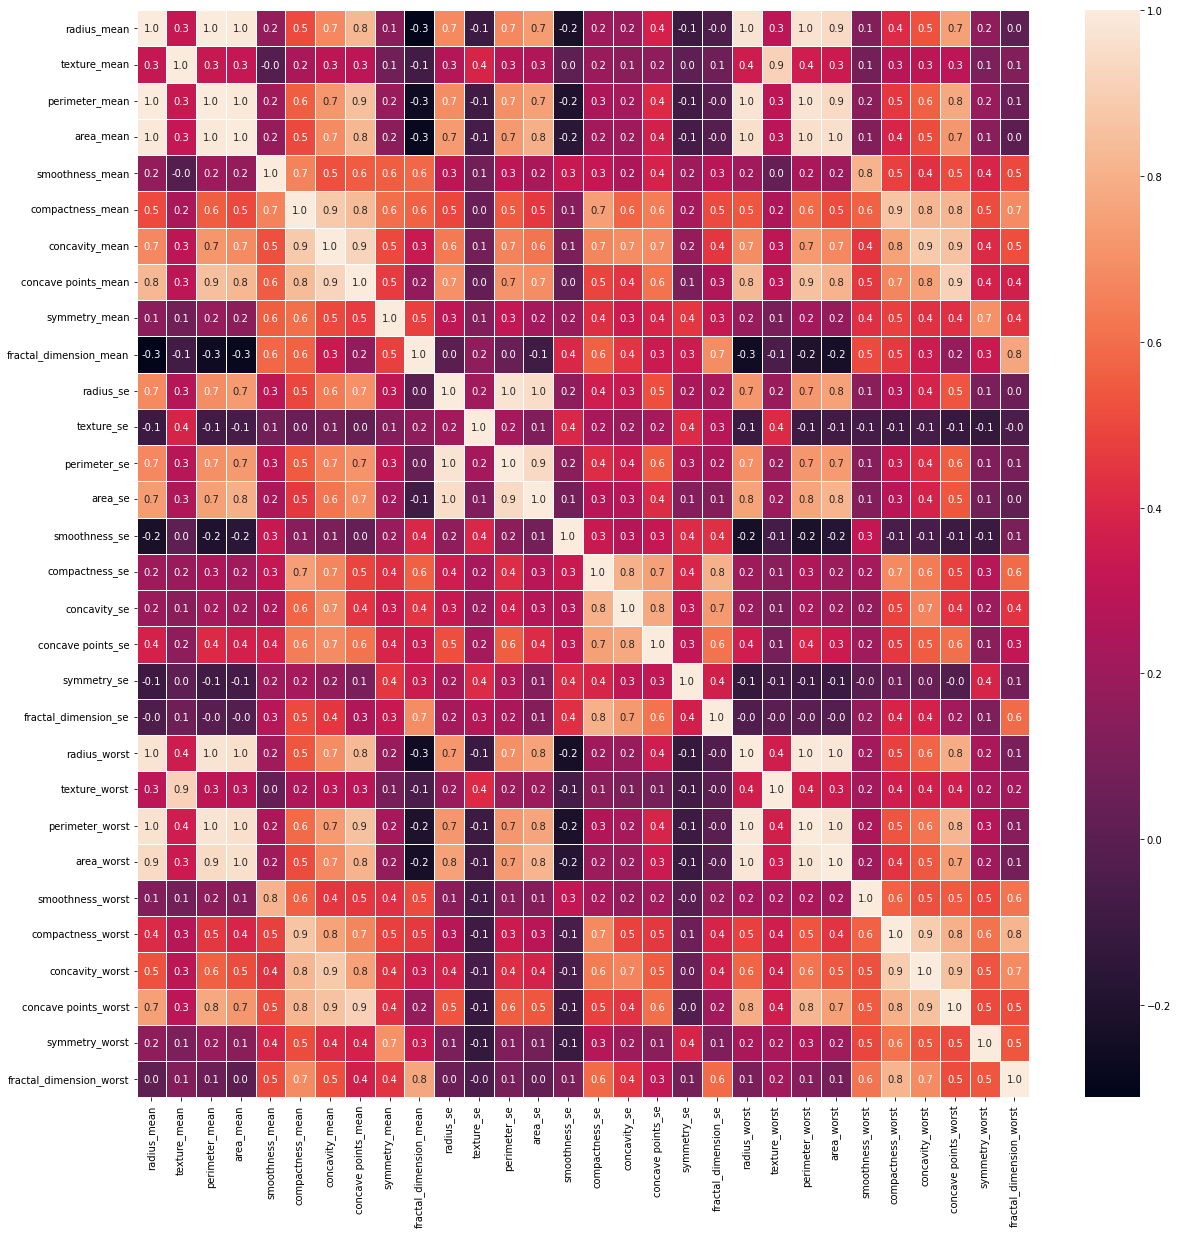

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot= True, linewidth = .5, fmt= '.1f')

### 6. Removing Redundant Features.

In [13]:
# from the plots we can see that there is some feature is highly correlated so we will remove them!
remove = ['compactness_worst' , 'concavity_worst' , 'concavity_mean']

data_std = data_std.drop(remove , axis = 1)

### 7. Splitting Data to Train and Test.

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(data_std,y, random_state = 110)

### 7. Testing our Data Model Using Logistic Regression and Random Forest.  


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.986013986013986

In [17]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.9790209790209791

<h2 align=center> After Applying EDA and Feature Engineering, We got a Good Accuracy 98%.</h2>
